#Veriyi dosya sisteminden okuma işlemi

In [0]:
import pandas as pd
import numpy as np
from numpy import array
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
## Pyspark kütüphanelerini projeye dahil etme 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark import sql
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F
from pyspark.sql.functions import *

## Fititng K means Model 
from sklearn.cluster import KMeans

from pyspark.ml.feature import VectorAssembler
### Converting lat long to float values
from pyspark.sql.types import DoubleType

# Importing ML libraries
from pyspark.ml.regression import LinearRegression  
from pyspark.ml.feature import VectorAssembler  
from pyspark.ml.feature import StandardScaler  
from pyspark.ml import Pipeline  
from pyspark.sql.functions import *  

# Dosya tipi ve lokasyonu
file_location = "/FileStore/tables/yellow_tripdata_2016_02*.csv"
file_type = "csv"

# CSV seçenekleri
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


print("Toplam Veri Sayısı:",df.count())

temp_table_name = "yellow_taxi"
df.createOrReplaceTempView(temp_table_name)


display(df)

Toplam Veri Sayısı: 1048524


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2016-02-25T17:24:20.000+0000,2016-02-25T17:27:20.000+0000,2,0.7,-73.94725036621094,40.763771057128906,1,N,-73.99201202392578,40.735389709472656,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8
2,2016-02-25T23:10:50.000+0000,2016-02-25T23:31:50.000+0000,2,5.52,-73.98301696777344,40.75099182128906,1,N,-73.98858642578125,40.75883865356445,2,20.0,0.5,0.5,0.0,0.0,0.3,21.3
2,2016-02-01T00:00:01.000+0000,2016-02-01T00:10:52.000+0000,6,1.99,-73.99234008789062,40.758201599121094,1,N,-73.96435546875,40.75797653198242,1,9.5,0.5,0.5,0.7,0.0,0.3,11.5
1,2016-02-01T00:00:04.000+0000,2016-02-01T00:05:16.000+0000,1,1.5,-73.98145294189453,40.74972152709961,1,N,-73.9823226928711,40.76398468017578,2,6.5,0.5,0.5,0.0,0.0,0.3,7.8
2,2016-02-01T00:00:05.000+0000,2016-02-01T00:20:59.000+0000,1,5.6,-74.00060272216797,40.72975540161133,1,N,-73.95132446289062,40.66983413696289,1,20.0,0.5,0.5,4.0,0.0,0.3,25.3
2,2016-02-01T00:00:06.000+0000,2016-02-01T00:15:01.000+0000,1,4.69,-74.0051040649414,40.7190055847168,1,N,-73.94709014892578,40.68888473510742,2,16.0,0.5,0.5,0.0,0.0,0.3,17.3
2,2016-02-01T00:00:09.000+0000,2016-02-01T00:05:35.000+0000,1,1.45,-73.98600006103516,40.76214599609375,1,N,-73.99060821533203,40.74620819091797,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
2,2016-02-01T00:00:19.000+0000,2016-02-01T00:06:35.000+0000,1,1.1,-73.9663314819336,40.77342224121094,1,N,-73.95610809326172,40.78142166137695,2,6.5,0.5,0.5,0.0,0.0,0.3,7.8
2,2016-02-01T00:00:21.000+0000,2016-02-01T00:06:32.000+0000,1,1.96,-73.97655487060547,40.76569747924805,1,N,-73.97897338867188,40.744380950927734,1,7.5,0.5,0.5,1.0,0.0,0.3,9.8
2,2016-02-01T00:00:21.000+0000,2016-02-01T00:16:59.000+0000,2,4.5,-73.9765853881836,40.764930725097656,1,N,-73.91111755371094,40.7689094543457,2,16.0,0.5,0.5,0.0,0.0,0.3,17.3


In [0]:
"""
Independent Variables
id — a unique identifier for each trip
vendor_id — a code indicating the provider associated with the trip record
pickup_datetime — date and time when the meter was engaged
dropoff_datetime — date and time when the meter was disengaged
passenger_count — the number of passengers in the vehicle (driver entered value)
pickup_longitude — the longitude where the meter was engaged
pickup_latitude — the latitude where the meter was engaged
dropoff_longitude — the longitude where the meter was disengaged
dropoff_latitude — the latitude where the meter was disengaged
store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
 

Target Variable
trip_duration — duration of the trip in seconds
"""


Out[54]: '\nIndependent Variables\nid\u200a—\u200aa unique identifier for each trip\nvendor_id\u200a—\u200aa code indicating the provider associated with the trip record\npickup_datetime\u200a—\u200adate and time when the meter was engaged\ndropoff_datetime\u200a—\u200adate and time when the meter was disengaged\npassenger_count\u200a—\u200athe number of passengers in the vehicle (driver entered value)\npickup_longitude\u200a—\u200athe longitude where the meter was engaged\npickup_latitude\u200a—\u200athe latitude where the meter was engaged\ndropoff_longitude\u200a—\u200athe longitude where the meter was disengaged\ndropoff_latitude\u200a—\u200athe latitude where the meter was disengaged\nstore_and_fwd_flag\u200a—\u200aThis flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server\u200a—\u200aY=store and forward; N=not a store and forward trip.\n \n\nTarget Variable\ntrip_duration\u200a—\u

#Veride bulunan aykırı değerleri temizleme

In [0]:
def clean_and_filter(df):
    ## Converting to appropriate datatypes
    df = df.withColumn('pickup_longitude', df['pickup_longitude'].cast('float'))
    df = df.withColumn('pickup_latitude', df['pickup_latitude'].cast('float'))
    df = df.withColumn('dropoff_longitude', df['dropoff_longitude'].cast('float'))
    df = df.withColumn('dropoff_latitude', df['dropoff_latitude'].cast('float'))
      ## Converting to appropriate datatype
    df = df.withColumn('trip_distance', df['trip_distance'].cast('float'))
    
    #NYC nin koordinatları dışındakileri sil
    df = df.filter("pickup_latitude>=40.53 and pickup_latitude<=40.88")
    df = df.filter("pickup_longitude>=-74.09 and pickup_longitude<=-73.72")
    #31 milden fazla yolculukları sil
    df = df.filter("trip_distance>=0.25 and trip_distance<31")
    
    #6 dan fazla yolcu olamaz
    df = df.filter("passenger_count>0 and passenger_count<7")
    #Ücret en az 2.5 dolar en fazla 500 dolar olabilir
    df = df.filter("total_amount>2.5 and total_amount<500")
      
    #Hız 0 dan düşükse sil
    df = df.filter("Speed_mph>0")

    ## Boş satırları sil
    df = df.na.drop()
    df.show(3)
    return df



#Özellik Oluşturma

Pickup_datetime ve dropoff_datetime'ın nesnelerinden yararlanarak istersek,  yeni özellikler oluşturabiliriz.

Hız, Yolculuk süresi, yolcunun bırakıldığı saat, ayı veri setimize ekleme işlemleri yapılmıştır.

In [0]:
## Hızı hesaplama
format = "yyyy-MM-dd HH:mm:ss"
timeDiff = (F.unix_timestamp('tpep_dropoff_datetime', format)
            - F.unix_timestamp('tpep_pickup_datetime', format))/60

df = df.withColumn("tpep_pickup_datetime", from_unixtime(unix_timestamp(df.tpep_pickup_datetime, "yyyy-MM-dd HH:mm:ss")))
df = df.withColumn("pickup_hr",hour(df.tpep_pickup_datetime))
df = df.withColumn("Duration_in_mins", timeDiff)
df = df.withColumn("Speed_mph",df.trip_distance/ ((df.Duration_in_mins)/60))
df = df.withColumn("pickup_month",month(df.tpep_pickup_datetime))

import datetime as dt
#Haftanın Gününü hesaplama
def get_weekday(date):
    import datetime
    import calendar
    date = date.split(' ')[0]
    year,month,day = (int(x) for x in date.split('-'))    
    weekday = datetime.date(year, month, day)
    return calendar.day_name[weekday.weekday()]


weekday_udf = udf(get_weekday)
df = df.withColumn('pickup_day', weekday_udf(df.tpep_pickup_datetime))


df = df.withColumn('pickup_longitude', df['pickup_longitude'].cast('float'))
df = df.withColumn('pickup_latitude', df['pickup_latitude'].cast('float'))
df = df.withColumn('dropoff_longitude', df['dropoff_longitude'].cast('float'))
df = df.withColumn('dropoff_latitude', df['dropoff_latitude'].cast('float'))


#Yeni verilerimi ekledikten sonra aykırı değerleri temizle
df= clean_and_filter(df)
print("Aykırı değerler temizlendikten sonra veri Sayısı:",df.count())

+--------+--------------------+---------------------+---------------+-------------+----------------+---------------+----------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+---------+----------------+------------------+------------+----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|pickup_longitude|pickup_latitude|RatecodeID|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|pickup_hr|Duration_in_mins|         Speed_mph|pickup_month|pickup_day|
+--------+--------------------+---------------------+---------------+-------------+----------------+---------------+----------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+---------+-----------

In [0]:
#df.describe()

In [0]:
#Birden çok sütunu bir vektör sütununda birleştiren bir özellik dönüştürücü.
vecAssembler = VectorAssembler(inputCols=["dropoff_latitude", "dropoff_longitude"], outputCol="features")
new_df = vecAssembler.transform(df)
display(new_df)
from pyspark.ml.clustering import KMeans

#K-means kümeleme işlemi
kmeans = KMeans(k=15, seed=1) 
model = kmeans.fit(new_df.select('features'))


vecAssembler = VectorAssembler(inputCols=["pickup_latitude", "pickup_longitude"], outputCol="features")
new_df = vecAssembler.transform(df)
df = model.transform(new_df)

## Pickup kümesine tahmin atama işlemi ve column ismini değiştirme
df = df.withColumnRenamed('prediction', 'pickup_cluster')
df = df.drop('features')

vecAssembler = VectorAssembler(inputCols=["dropoff_latitude", "dropoff_longitude"], outputCol="features")
new_df = vecAssembler.transform(df)
df = model.transform(new_df)

df = df.withColumnRenamed('prediction', 'dropoff_cluster')
df = df.drop('features')

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hr,Duration_in_mins,Speed_mph,pickup_month,pickup_day,features
2,2016-02-25 17:24:20,2016-02-25T17:27:20.000+0000,2,0.7,-73.94725,40.76377,1,N,-73.99201,40.73539,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8,17,3.0,13.999999999999998,2,Thursday,"Map(vectorType -> dense, length -> 2, values -> List(40.735389709472656, -73.99201202392578))"
2,2016-02-25 23:10:50,2016-02-25T23:31:50.000+0000,2,5.52,-73.98302,40.75099,1,N,-73.98859,40.75884,2,20.0,0.5,0.5,0.0,0.0,0.3,21.3,23,21.0,15.77142857142857,2,Thursday,"Map(vectorType -> dense, length -> 2, values -> List(40.75883865356445, -73.98858642578125))"
2,2016-02-01 00:00:01,2016-02-01T00:10:52.000+0000,6,1.99,-73.99234,40.7582,1,N,-73.964355,40.757977,1,9.5,0.5,0.5,0.7,0.0,0.3,11.5,0,10.85,11.004608294930877,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.75797653198242, -73.96435546875))"
1,2016-02-01 00:00:04,2016-02-01T00:05:16.000+0000,1,1.5,-73.98145,40.74972,1,N,-73.98232,40.763985,2,6.5,0.5,0.5,0.0,0.0,0.3,7.8,0,5.2,17.307692307692307,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.76398468017578, -73.9823226928711))"
2,2016-02-01 00:00:05,2016-02-01T00:20:59.000+0000,1,5.6,-74.0006,40.729755,1,N,-73.951324,40.669834,1,20.0,0.5,0.5,4.0,0.0,0.3,25.3,0,20.9,16.076555023923444,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.66983413696289, -73.95132446289062))"
2,2016-02-01 00:00:06,2016-02-01T00:15:01.000+0000,1,4.69,-74.005104,40.719006,1,N,-73.94709,40.688885,2,16.0,0.5,0.5,0.0,0.0,0.3,17.3,0,14.916666666666666,18.864804469273746,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.68888473510742, -73.94709014892578))"
2,2016-02-01 00:00:09,2016-02-01T00:05:35.000+0000,1,1.45,-73.986,40.762146,1,N,-73.99061,40.74621,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,0,5.433333333333334,16.012269938650306,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.74620819091797, -73.99060821533203))"
2,2016-02-01 00:00:19,2016-02-01T00:06:35.000+0000,1,1.1,-73.96633,40.773422,1,N,-73.95611,40.78142,2,6.5,0.5,0.5,0.0,0.0,0.3,7.8,0,6.266666666666667,10.531914893617023,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.78142166137695, -73.95610809326172))"
2,2016-02-01 00:00:21,2016-02-01T00:06:32.000+0000,1,1.96,-73.976555,40.765697,1,N,-73.97897,40.74438,1,7.5,0.5,0.5,1.0,0.0,0.3,9.8,0,6.183333333333334,19.0188679245283,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.744380950927734, -73.97897338867188))"
2,2016-02-01 00:00:21,2016-02-01T00:16:59.000+0000,2,4.5,-73.976585,40.76493,1,N,-73.91112,40.76891,2,16.0,0.5,0.5,0.0,0.0,0.3,17.3,0,16.633333333333333,16.23246492985972,2,Monday,"Map(vectorType -> dense, length -> 2, values -> List(40.7689094543457, -73.91111755371094))"


#Seaborn kullanarak verimizi görselleştirme

/databricks/python/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
Out[59]: <seaborn.axisgrid.FacetGrid at 0x7fa51bc183a0>

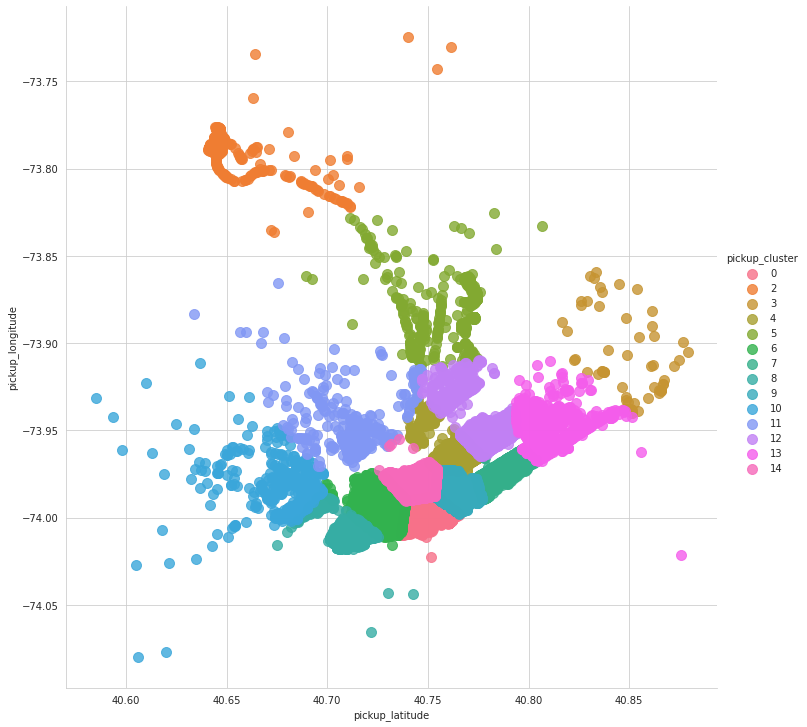

In [0]:
import seaborn as sns
### Visualizing the clusters
pd_df = df.toPandas()
pd_df = pd_df.sample(frac= 0.1)
sns.set_style("whitegrid")
sns.lmplot(x="pickup_latitude", y="pickup_longitude",data = pd_df[pd_df['pickup_latitude']!=0.0],fit_reg=False,hue='pickup_cluster',size=10,scatter_kws={"s":100})


Out[60]: Text(0.5, 1.0, 'Haftanın günlerine göre yolculuk süreleri')

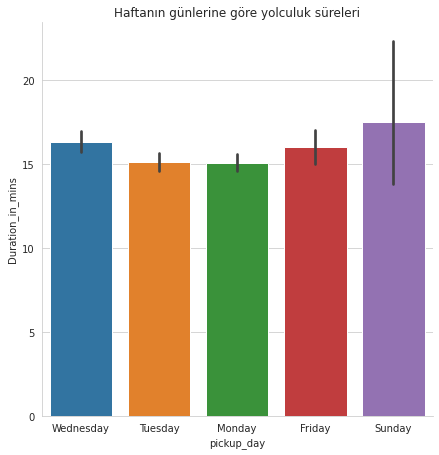

In [0]:
sns.catplot(x="pickup_day",y="Duration_in_mins",kind="bar",data=pd_df,height=6,aspect=1)
plt.title('Haftanın günlerine göre yolculuk süreleri')

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


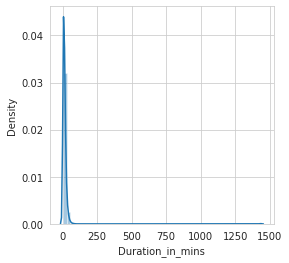

In [0]:
#Modelimizdeki hedef değişken ‘Duration_in_mins’ olduğu için onun dağılımına bakıyoruz ve veri setinin geri kalanından ayırıyoruz.
plt.figure(figsize=(4,4))
X = pd_df.drop(['Duration_in_mins'], axis=1)
y = pd_df['Duration_in_mins']
sns.distplot(y)
plt.show()

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


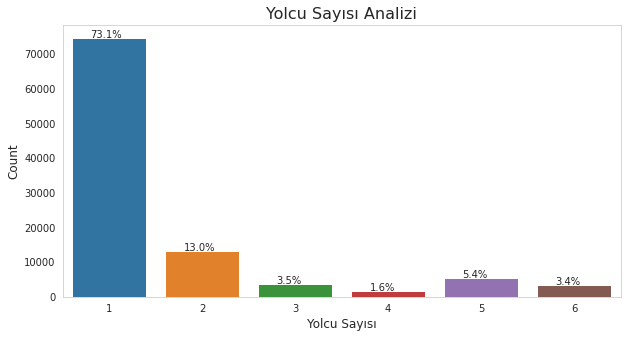

In [0]:
# Yolcu_sayısı verileri için veri dağılımını kontrol etme

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(pd_df.passenger_count, ax = ax)
ax.set_title('Yolcu Sayısı Analizi', size = 16)
ax.set_xlabel('Yolcu Sayısı', size = 12)
ax.set_ylabel('Count', size = 12)
ax.grid(axis='y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format( (p.get_height() / pd_df.shape[0]) * 100 ), (p.get_x()+0.2, p.get_height()+55))
plt.show()


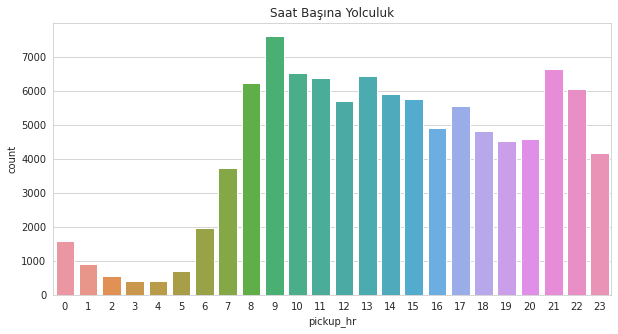

In [0]:
figure,(ax9)=plt.subplots(ncols=1,figsize=(10,5))
ax9.set_title('Saat Başına Yolculuk')
ax=sns.countplot(x="pickup_hr",data=pd_df,ax=ax9)

Out[64]: <seaborn.axisgrid.FacetGrid at 0x7fa51ad731f0>

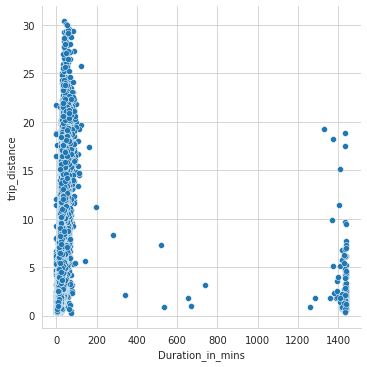

In [0]:
sns.relplot(y=pd_df.trip_distance,x='Duration_in_mins',data=pd_df)


In [0]:
df = df.withColumn('VendorID', df['VendorID'].cast('double'))
df = df.withColumn('passenger_count', df['passenger_count'].cast('double'))
df = df.withColumn('trip_distance', df['trip_distance'].cast('double'))
df = df.withColumn('RatecodeID', df['RatecodeID'].cast('double'))
df = df.withColumn('store_and_fwd_flag', df['store_and_fwd_flag'].cast('double'))
df = df.withColumn('payment_type', df['payment_type'].cast('double'))
df = df.withColumn('fare_amount', df['fare_amount'].cast('double'))
df = df.withColumn('extra', df['extra'].cast('double'))
df = df.withColumn('mta_tax', df['mta_tax'].cast('double'))
df = df.withColumn('tip_amount', df['tip_amount'].cast('double'))
df = df.withColumn('tolls_amount', df['tolls_amount'].cast('double'))
df = df.withColumn('improvement_surcharge', df['improvement_surcharge'].cast('double'))
df = df.withColumn('total_amount', df['total_amount'].cast('double'))


#Özelliklerimiz
features = ['passenger_count', 'trip_distance', \
            'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',\
            'improvement_surcharge', 'pickup_cluster', 'dropoff_cluster', 'pickup_hr', 'Speed_mph']
lr_data = df.select(col("Duration_in_mins").alias("label"), *features) 

## Null değer var mı kontrol et ve sil
for f in features:
    print (f)
    #print (lr_data.where(col(f).isNull()).count())
    
lr_data = lr_data.dropna()

# Train/Test olarak verimizi bölüyoruz.
(training, test) = lr_data.randomSplit([.2, .8])

#Linear regresyon uygula
vectorAssembler = VectorAssembler(inputCols=features, outputCol="unscaled_features")  
# Ölçeklendirme işlemi
standardScaler = StandardScaler(inputCol="unscaled_features", outputCol="features")  
lr = LinearRegression(maxIter=10, regParam=.01)

#Pipeline Uygulama
stages = [vectorAssembler, standardScaler, lr]  
pipeline = Pipeline(stages=stages) 

model = pipeline.fit(training)  
prediction = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator  
eval = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

eval

passenger_count
trip_distance
RatecodeID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
pickup_cluster
dropoff_cluster
pickup_hr
Speed_mph
Out[68]: RegressionEvaluator_60408f5e3d13

In [0]:
lr_data

Out[66]: DataFrame[label: double, passenger_count: double, trip_distance: double, RatecodeID: double, payment_type: double, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, pickup_cluster: int, dropoff_cluster: int, pickup_hr: int, Speed_mph: double]

In [0]:
# Root Mean Square Error
rmse = eval.evaluate(prediction)  
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})  
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})  
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})  
print("r2: %.3f" %r2)  

RMSE: 48.439
MSE: 2346.337
MAE: 4.418
r2: 0.036
